a. Φορτώστε τα δεδομένα. (Μπορείτε να χρησιμοποιήσετε
το load_digits από το sklearn.datasets.)

In [1]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

In [2]:
digits = load_digits()

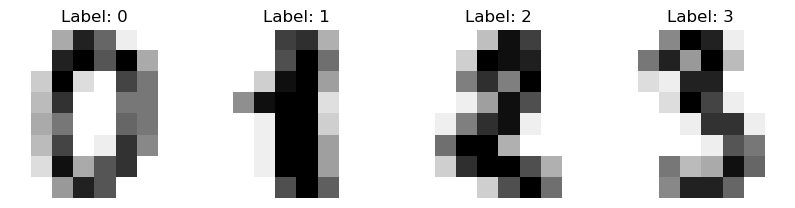

In [3]:
_, axes = plt.subplots(1, 4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Label: %i' % label)

plt.show()

b. Χωρίστε τα δεδομένα σε σύνολο εκπαίδευσης και σύνολο ελέγχου.

In [4]:
from sklearn.model_selection import train_test_split

X, y = digits.data, digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Κανονικοποιήστε τα χαρακτηριστικά ανάμεσα στο διάστημα [0, 1].

In [5]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

d. Δημιουργήστε ένα MLP Classifier. Ορίστε τον αριθμό των κρυφών
στρώσεων, των νευρώνων και τη συνάρτηση ενεργοποίησης όπως
εσείς θέλετε.

In [6]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', random_state=42)

e. Εκπαιδεύστε το μοντέλο χρησιμοποιώντας τα δεδομένα
εκπαίδευσης.


In [7]:
mlp.fit(X_train_scaled, y_train)

MLPClassifier(hidden_layer_sizes=(100, 50), random_state=42)

f. Αξιολογήστε το μοντέλο σας στο σύνολο ελέγχου

In [8]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = mlp.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{conf_matrix}")

class_report = classification_report(y_test, y_pred)
print(f"Classification Report:\n{class_report}")


Accuracy: 0.9805555555555555
Confusion Matrix:
[[33  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 33  0  1  0  0  0  0]
 [ 0  0  0  0 46  0  0  0  0  0]
 [ 0  0  0  0  0 45  1  0  0  1]
 [ 1  0  0  0  0  0 34  0  0  0]
 [ 0  0  0  0  0  0  0 33  0  1]
 [ 0  1  0  0  0  1  0  0 28  0]
 [ 0  0  0  0  0  0  0  0  0 40]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        33
           1       0.97      1.00      0.98        28
           2       1.00      1.00      1.00        33
           3       1.00      0.97      0.99        34
           4       1.00      1.00      1.00        46
           5       0.96      0.96      0.96        47
           6       0.97      0.97      0.97        35
           7       1.00      0.97      0.99        34
           8       1.00      0.93      0.97        30
           9       0.95      1.00      0.98        40

   

In [9]:
import time

def debug(func):
    '''
    Shows the parameters in the model and how much time it took for the training
    ----------------------------------------------------------------------------
    d: (bool) if True it will show more info

    Ex: mlp(..., d=True)
    '''
    def wrapper(*args, **kwargs):
        if not kwargs.get('d', False):
            return func(*args, **kwargs)
        print(f"Function {func.__name__}\n--------------------")
        for key, value in kwargs.items():
            print(f'Parameter {key} = {value}')
        start_time = time.time()
        result = func(*args, **kwargs)
        end_time = time.time()
        print(f"Took {end_time - start_time:.2f} seconds\n")
        return result
    return wrapper


In [10]:
@debug
def mlp_model(X_train_scaled, y_train, **kwargs):
    neuron = kwargs.get('n', (100,))
    activation = kwargs.get('a', 'relu')
    learning_rate = kwargs.get('l', 0.001)
    mlp = MLPClassifier(hidden_layer_sizes=neuron, activation=activation, learning_rate_init=learning_rate, verbose=0, random_state=42)
    mlp.fit(X_train_scaled, y_train)
    return mlp

def mlp_test(model, X_test_scaled, y_test):
    y_pred = model.predict(X_test_scaled)
    return accuracy_score(y_test, y_pred)


In [11]:
from itertools import product
import pandas as pd

def experiment_mlp(X_train_scaled, X_test_scaled, y_train, y_test, **kwargs):
  '''
  Does experiment with mlp

  parameters
  -----------
  n: (list) a list of tuples with values for neurons
  a: (list) a list of strings with values for the activation function
  l: (list) a list of floats with values for the learning rate
  debug: (bool) if true will show the elapsed time
  returns dataframe sorted by accuracy
  '''
  neurons = kwargs.get('n', (100,))
  activations = kwargs.get('a', 'relu')
  learning_rates = kwargs.get('l', 0.001)
  debug = kwargs.get('debug', False)
  results = {'neuron': [], 'activation': [], 'learning_rate': [], 'accuracy': []}
  for neuron, activation, learning_rate in product(neurons, activations, learning_rates):
    model = mlp_model(X_train_scaled, y_train, n=neuron, a=activation, l=learning_rate, d=debug)
    accuracy = mlp_test(model, X_test_scaled, y_test)
    results['neuron'].append(neuron)
    results['activation'].append(activation)
    results['learning_rate'].append(learning_rate)
    results['accuracy'].append(accuracy)
  results_df = pd.DataFrame.from_dict(results)
  results_df = results_df.sort_values(by=['accuracy'], ascending=False)
  return results_df

In [12]:
activations = ['identity', 'tanh', 'relu']
neurons = [(100, 50), (100, 50, 25), (50,)]
learning_rates = [0.01, 0.001, 0.0001]

In [13]:
results_df = experiment_mlp(X_train_scaled, X_test_scaled, y_train, y_test, n=neurons, a=activations, l=learning_rates)

c:\Users\giorg\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\giorg\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\giorg\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\giorg\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\giorg\anaconda3\lib\site-packages\sklearn\neural_network\_multi

In [14]:
print(results_df.head())

           neuron activation  learning_rate  accuracy
12  (100, 50, 25)       tanh          0.010  0.980556
7       (100, 50)       relu          0.001  0.980556
21          (50,)       tanh          0.010  0.977778
16  (100, 50, 25)       relu          0.001  0.977778
22          (50,)       tanh          0.001  0.977778


In [15]:
print(f'Best result is\n {results_df.iloc[[0]]}')

Best result is
            neuron activation  learning_rate  accuracy
12  (100, 50, 25)       tanh           0.01  0.980556


a. Φορτώστε τα δεδομένα(MNIST) και χωρίστε τα σε σύνολα
εκπαίδευσης και ελέγχου.

In [16]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784')

c:\Users\giorg\anaconda3\lib\site-packages\sklearn\datasets\_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [17]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.2, random_state=42)

Κανονικοποιήστε τα δεδομένα ανάμεσα στο διάστημα [0, 1].

In [18]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

c. Κατασκευάστε ένα MLP Classifier χρησιμοποιώντας την βιβλιοθήκη
scikit-learn.

In [19]:
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', random_state=42)
mlp.fit(X_train_scaled, y_train)

MLPClassifier(hidden_layer_sizes=(100, 50), random_state=42)

d. Εκπαιδεύστε το μοντέλο MLP στα δεδομένα εκπαίδευσης

In [20]:
y_pred = mlp.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")

Accuracy: 0.9776428571428571
Confusion Matrix:
[[1326    1    2    1    2    1    5    2    2    1]
 [   0 1580    4    2    2    0    2    7    2    1]
 [   1    4 1353    3    2    2    3    5    5    2]
 [   0    1    9 1399    1    6    1    7    5    4]
 [   2    0    5    0 1262    1    1    2    2   20]
 [   1    0    1   11    1 1241   10    1    7    0]
 [   4    1    3    0    5    1 1378    0    4    0]
 [   2    1   11    4    2    3    0 1470    1    9]
 [   4    5   10   11    3    7    2    4 1305    6]
 [   4    0    1    6   14    5    0   11    6 1373]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1343
           1       0.99      0.99      0.99      1600
           2       0.97      0.98      0.97      1380
           3       0.97      0.98      0.97      1433
           4       0.98      0.97      0.97      1295
           5       0.98      0.97      0.98      1273
           6       0

e. Κατασκευάστε ένα Support Vector Machine (SVM) Classifier επίσης
χρησιμοποιώντας την βιβλιοθήκη scikit-learn.

In [21]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=1.0, random_state=42)
svm.fit(X_train_scaled, y_train)

SVC(kernel='linear', random_state=42)

Εκπαιδεύστε το μοντέλο SVM στα δεδομένα εκπαίδευσης

In [22]:
y_pred = svm.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")

Accuracy: 0.9350714285714286
Confusion Matrix:
[[1310    1    4    0    3   11    7    1    5    1]
 [   0 1571    3    8    1    4    0    5    5    3]
 [   8   16 1272   14   14    4   13    7   26    6]
 [   8    9   27 1323    1   32    0   10   14    9]
 [   6    1   11    0 1218    3    5    8    5   38]
 [   5   10    5   47    7 1148   16    3   25    7]
 [   4    4   16    2   11   26 1330    0    3    0]
 [   2    5   26    4   13    7    0 1428    1   17]
 [   8   18   21   48    5   32    8   10 1195   12]
 [   6   10    9    9   35    5    0   39   11 1296]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1343
           1       0.96      0.98      0.97      1600
           2       0.91      0.92      0.92      1380
           3       0.91      0.92      0.92      1433
           4       0.93      0.94      0.94      1295
           5       0.90      0.90      0.90      1273
           6       0

g. Συγκρίνετε τις αποδόσεις των δύο μοντέλων στο σύνολο ελέγχου

Το MLP είναι πιο ακριβές

In [23]:
@debug
def svm_model(X_train_scaled, y_train, **kwargs):
    C = kwargs.get('C', 1)
    kernel = kwargs.get('k', 'rbf')
    svm = SVC(C=C, kernel=kernel, random_state=42)
    svm.fit(X_train_scaled, y_train)
    
    return svm

def svm_test(svm, X_test_scaled, y_test):
    y_pred = svm.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

In [24]:
def experiment_svm(X_train_scaled, X_test_scaled, y_train, y_test, **kwargs):
  '''
  Does experiment with svm

  parameters
  -----------
  C: (list) a list of floats with C values
  k: (list) a list of strings with values for the kernel
  debug: (bool) if True it will show the elapsed time
  returns dataframe sorted by accuracy
  '''
  Cs = kwargs.get('C', 1)
  kernels = kwargs.get('k', 'rbf')
  debug = kwargs.get('debug', False)
  results = {'C': [], 'kernel': [], 'accuracy': []}
  for C, kernel in product(Cs, kernels):
    svm = svm_model(X_train_scaled, y_train, C=C, k=kernel, d=debug)
    accuracy = svm_test(svm, X_test_scaled, y_test)
    results['C'].append(C)
    results['kernel'].append(kernel)
    results['accuracy'].append(accuracy)
  results_df = pd.DataFrame.from_dict(results)
  results_df_svm = results_df.sort_values(by=['accuracy'], ascending=False)
  return results_df_svm

In [25]:
Cs = [1, 5]
kernels = ['linear', 'rbf']

In [26]:
results_df_svm = experiment_svm(X_train_scaled, X_test_scaled, y_train, y_test, C=Cs, k=kernels)

In [27]:
results_df_svm.head()

,C,kernel,accuracy
3,5,rbf,0.981571
1,1,rbf,0.976214
0,1,linear,0.935071
2,5,linear,0.927786


In [28]:
print(f'Best result is\n {results_df_svm.iloc[[0]]}')

Best result is
    C kernel  accuracy
3  5    rbf  0.981571


In [29]:
activations = ['relu', 'tanh']
neurons = [(20,), (20, 10), (20, 10, 5)]
learning_rates = [0.01, 0.001]

In [30]:
results_df = experiment_mlp(X_train_scaled, X_test_scaled, y_train, y_test, n=neurons, a=activations, l=learning_rates)

c:\Users\giorg\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\giorg\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\giorg\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\giorg\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [31]:
print(results_df.head())

     neuron activation  learning_rate  accuracy
4  (20, 10)       relu          0.010  0.948571
1     (20,)       relu          0.001  0.947071
0     (20,)       relu          0.010  0.944571
3     (20,)       tanh          0.001  0.941286
5  (20, 10)       relu          0.001  0.940000


In [32]:
print(f'Best result is\n {results_df.iloc[[0]]}')

Best result is
      neuron activation  learning_rate  accuracy
4  (20, 10)       relu           0.01  0.948571
